In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import sklearn.metrics as metrics

#### Defining the data set

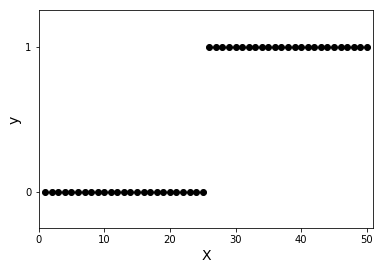

In [2]:
x=np.arange(1,51)
y=np.zeros(50)
y[25:50]=1
plt.scatter(x.ravel(), y, color='black', zorder=10)
plt.ylabel('y', fontsize=14)
plt.xlabel('X', fontsize=14)
plt.ylim(-.25, 1.25)
plt.xlim(0, 51)
plt.yticks([0, 1])
plt.savefig('sep_data_set.png', dpi=300)
plt.show()


#### Random Classifier

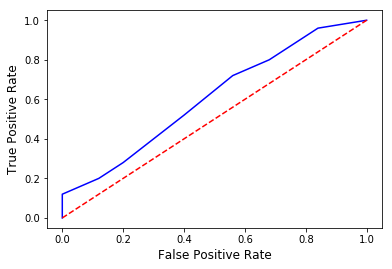

In [3]:
np.random.seed(2)
def predict_proba(x):
    return(np.random.uniform(0, 1, x.shape[0]))

def roc_curve(y, prob):
    tpr_list = []
    fpr_list = []
    threshold = np.linspace(1.1, 0, 10)
    for t in threshold:
        y_pred = np.zeros(y.shape[0])
        y_pred[prob >= t] = 1
        TN = y_pred[(y_pred == y) & (y == 0)].shape[0]
        TP = y_pred[(y_pred == y) & (y == 1)].shape[0]
        FP = y_pred[(y_pred != y) & (y == 0)].shape[0]
        FN = y_pred[(y_pred != y) & (y == 1)].shape[0]
        TPR = TP / (TP + FN)
        FPR = FP / (FP + TN)
        tpr_list.append(TPR)
        fpr_list.append(FPR)
    return fpr_list, tpr_list, threshold

prob = predict_proba(x)
fpr, tpr, threshold = roc_curve(y, prob)

plt.plot(fpr, tpr, 'b')
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)

plt.show()

#### Increasing the number of points

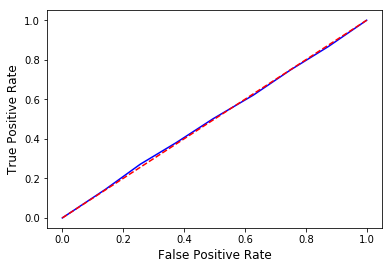

In [4]:
np.random.seed(2)
x1=np.arange(1,10001)
y1=np.zeros(10000)
y1[5000:10000]=1

prob = predict_proba(x1)
fpr, tpr, threshold = roc_curve(y1, prob)

plt.plot(fpr, tpr, 'b')
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)

plt.show()

#### Defining a separated data set

In [5]:
x2=np.arange(1,21)
y2=np.zeros(20)
y2[10:20]=1
x2 = x2.reshape(-1, 1)

#### Logistic regression

In [6]:
clf = linear_model.LogisticRegression(C=1e5, solver='lbfgs')
clf.fit(x2, y2)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

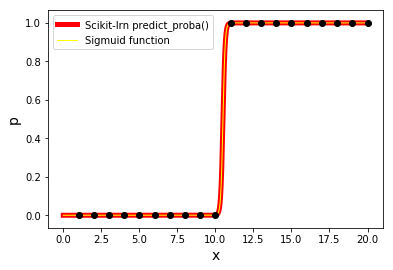

In [7]:
def sigmuid(x):
    return(1/(1+np.exp(-x)))

def logistic_predict_proba(x_test):
    return sigmuid(x_test * clf.coef_ + clf.intercept_)

x2_test = np.linspace(0, 20, 500).reshape(-1,1)

probs = clf.predict_proba(x2_test)
skl_prob=probs[:,1]
sigmuid_prob = logistic_predict_proba(x2_test)

plt.scatter(x2, y2, color='black', zorder=10)
plt.plot(x2_test, skl_prob, color='red', linewidth=5, label = "Scikit-lrn predict_proba()")
plt.plot(x2_test, sigmuid_prob, color= 'yellow', linewidth=1, label = "Sigmuid function")
plt.xlabel("x", fontsize=14)
plt.ylabel("p", fontsize=14)
plt.legend(loc = "upper left")

plt.show()

In [8]:
def logistic_predict(p):
    prediction = p.copy()
    prediction[p < 0.5] = 0
    prediction[p >= 0.5] = 1
    return prediction

skl_prediction = clf.predict(x2_test)

sigmuid_prediction = logistic_predict(sigmuid_prob)
sigmuid_prediction = sigmuid_prediction.ravel()

# Are sigmuid_prediction and skl_prediction arrays equal?
np.array_equal(sigmuid_prediction, skl_prediction)

True

#### Ploting the ROC curve using our roc_curve() funct

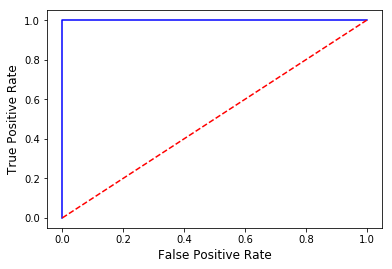

In [9]:
sigmuid_prob = logistic_predict_proba(x2).ravel()
fpr, tpr, threshold = roc_curve(y2, sigmuid_prob)

plt.plot(fpr, tpr, 'b')
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("False Positive Rate" , fontsize=12)
plt.ylabel("True Positive Rate" , fontsize=12)

plt.show()

#### Ploting the ROC curve using Scikit-Learn roc_curve() function 

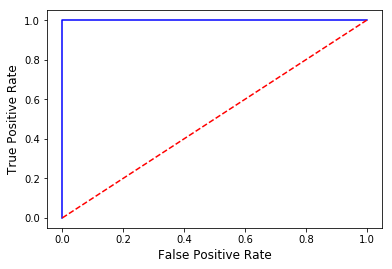

In [10]:
probs = clf.predict_proba(x2)
skl_prob=probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y2, skl_prob)

plt.plot(fpr, tpr, 'b')
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("False Positive Rate" , fontsize=12)
plt.ylabel("True Positive Rate" , fontsize=12)

plt.show()

In [11]:
threshold

array([2.00000000e+00, 1.00000000e+00, 9.99145774e-01, 1.10126504e-58])

In [12]:
skl_prob

array([1.10126504e-58, 1.39478815e-52, 1.76654476e-46, 2.23738666e-40,
       2.83372330e-34, 3.58900315e-28, 4.54558975e-22, 5.75713793e-16,
       7.29160328e-10, 9.22653305e-04, 9.99145774e-01, 9.99999999e-01,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00])

In [13]:
fpr

array([0., 0., 0., 1.])

In [14]:
tpr

array([0. , 0.7, 1. , 1. ])

In [15]:
t = threshold[1]
y2_pred = np.zeros(y2.shape[0])
y2_pred[skl_prob >= t] = 1
TN = y2_pred[(y2_pred == y2) & (y2 == 0)].shape[0]
TP = y2_pred[(y2_pred == y2) & (y2 == 1)].shape[0]
FP = y2_pred[(y2_pred != y2) & (y2 == 0)].shape[0]
FN = y2_pred[(y2_pred != y2) & (y2 == 1)].shape[0]
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)

# Calculating the TPR and FPR for a threshold value
print("Threshold", t)
print("TPR=", TPR)
print("FPR=", FPR)

Threshold 1.0
TPR= 0.7
FPR= 0.0


#### Defining a partially overlapped data set

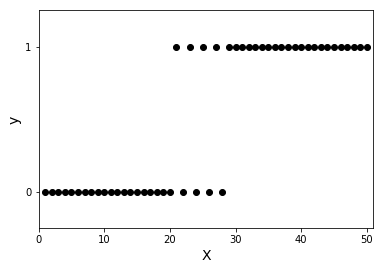

In [16]:
x3=np.arange(1,51)
y3=np.zeros(50)
y3[25:50]= 1
y3[20:25:2] = 1
y3[25:29:2] = 0
plt.scatter(x3, y3, color='black')
plt.ylabel('y' , fontsize=14)
plt.xlabel('X' , fontsize=14)

plt.yticks([0, 1])
plt.ylim(-.25, 1.25)
plt.xlim(0, 51)

plt.show()

#### Logistic regression

In [17]:
x3 = x3.reshape(-1, 1)
clf = linear_model.LogisticRegression(C=1e5, solver='lbfgs')
clf.fit(x3, y3)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

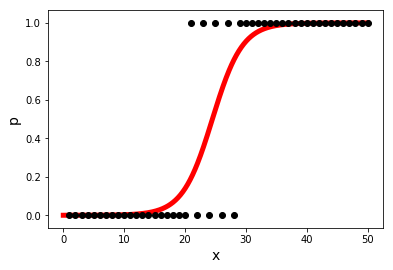

In [18]:
x3_test = np.linspace(0, 50, 500).reshape(-1,1)
loss = sigmuid(x3_test * clf.coef_ + clf.intercept_)
probs = clf.predict_proba(x3_test)

skl_prob=probs[:,1]
plt.scatter(x3, y3, color='black', zorder=10)

plt.plot(x3_test, skl_prob, color='red', linewidth=5)
plt.xlabel("x" , fontsize=14)
plt.ylabel("p" , fontsize=14)

plt.show()

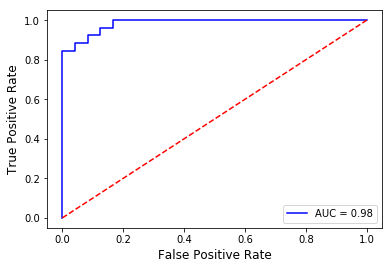

In [19]:
probs = clf.predict_proba(x3)
prob=probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y3, prob)
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = "AUC = %0.2f" % roc_auc)
plt.legend(loc = "lower right")
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("False Positive Rate" , fontsize=12)
plt.ylabel("True Positive Rate" , fontsize=12)

plt.show()

#### Increasing the overlapped fraction of data set

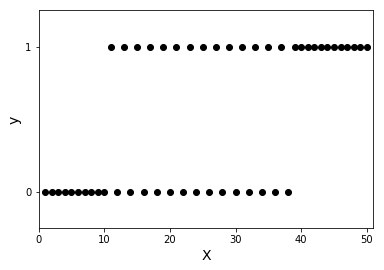

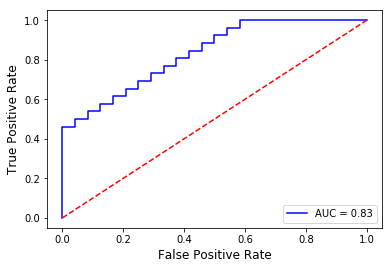

In [20]:
x4=np.arange(1,51)
y4=np.zeros(50)
y4[25:50]= 1
y4[10:25:2] = 1
y4[25:39:2] = 0
plt.scatter(x4, y4, color='black')
plt.ylabel('y' , fontsize=14)
plt.xlabel('X' , fontsize=14)

plt.yticks([0, 1])
plt.ylim(-.25, 1.25)
plt.xlim(0, 51)

plt.savefig('part_overlapped_data_set_inc.png', dpi=300)
plt.show()

x4 = x4.reshape(-1, 1)
clf = linear_model.LogisticRegression(C=1e5, solver='lbfgs')
clf.fit(x4, y4)

probs = clf.predict_proba(x4)
prob=probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y4, prob)
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = "AUC = %0.2f" % roc_auc)
plt.legend(loc = "lower right")
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("False Positive Rate" , fontsize=12)
plt.ylabel("True Positive Rate" , fontsize=12)

plt.show()

#### Defining a fully overlapped data set

In [21]:
x5=np.arange(1,101)
y5=np.zeros(100)
y5[1:100:2]= 1

In [22]:
x5 = x5.reshape(-1, 1)
clf = linear_model.LogisticRegression(C=1e5, solver='lbfgs')
clf.fit(x5, y5)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

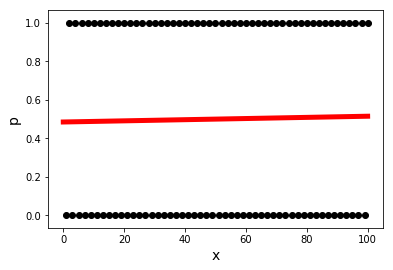

In [23]:
x_test = np.linspace(0, 100, 500).reshape(-1,1)
probs = clf.predict_proba(x_test)
prob=probs[:,1]

plt.scatter(x5, y5, color='black', zorder=20)
plt.plot(x_test, prob, color='red', linewidth=5)
plt.xlabel("x" , fontsize=14)
plt.ylabel("p" , fontsize=14)

plt.show()

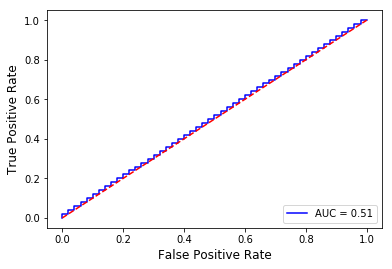

In [24]:
probs = clf.predict_proba(x5)
prob=probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y5, prob)
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = "AUC = %0.2f" % roc_auc)
plt.legend(loc = "lower right")
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("False Positive Rate" , fontsize=12)
plt.ylabel("True Positive Rate" , fontsize=12)

plt.show()

#### Going back to the a partially overlapped data set

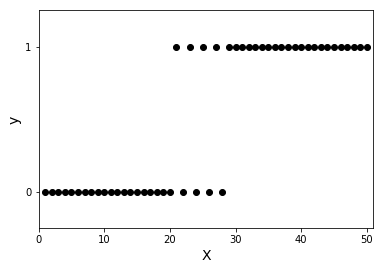

In [25]:
x3=np.arange(1,51)
y3=np.zeros(50)
y3[25:50]= 1
y3[20:25:2] = 1
y3[25:29:2] = 0
plt.scatter(x3, y3, color='black')
plt.ylabel('y' , fontsize=14)
plt.xlabel('X' , fontsize=14)

plt.yticks([0, 1])
plt.ylim(-.25, 1.25)
plt.xlim(0, 51)

plt.show()

#### Logistic regression

In [26]:
x3 = x3.reshape(-1, 1)
clf = linear_model.LogisticRegression(C=1e5, solver='lbfgs')
clf.fit(x3, y3)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

#### Mislabeling the points in the roc_curve function()

In [27]:
def logistic_mispredict_proba(x_test):
    return 1-sigmuid(x_test * clf.coef_ + clf.intercept_)


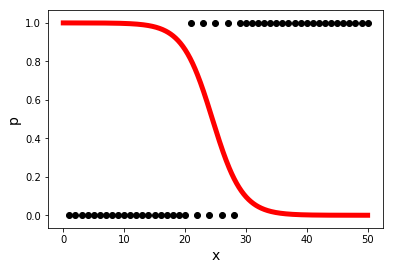

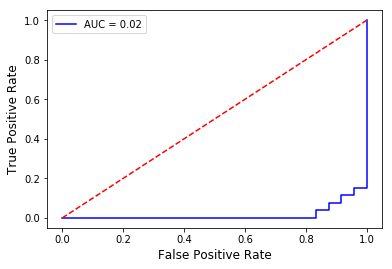

In [28]:
sigmuid_prob = logistic_mispredict_proba(x3).flatten()
prob = logistic_mispredict_proba(x3_test)

plt.scatter(x3, y3, color='black', zorder=10)

plt.plot(x3_test, prob, color='red', linewidth=5)
plt.xlabel("x" , fontsize=14)
plt.ylabel("p" , fontsize=14)

plt.savefig('part_overlapped_data_set_logistic.png', dpi=300)
plt.show()

fpr, tpr, threshold = metrics.roc_curve(y3, sigmuid_prob)
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = "AUC = %0.2f" % roc_auc)
plt.legend(loc = "upper left")
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("False Positive Rate" , fontsize=12)
plt.ylabel("True Positive Rate" , fontsize=12)

plt.show()